In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\johir\anaconda3\envs\python_first_practice\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

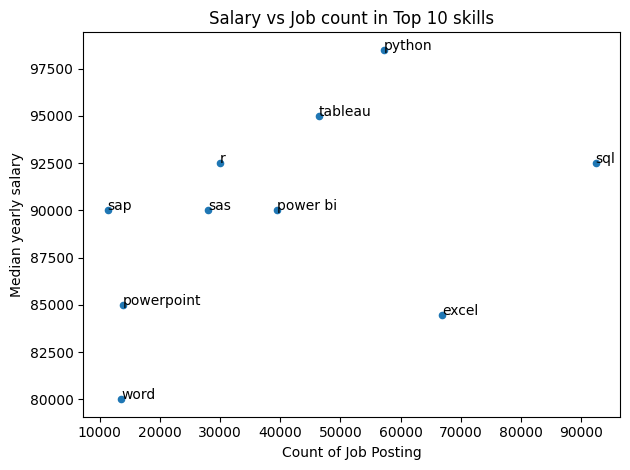

In [ ]:
df_explode = df.explode('job_skills')

skill_states = df_explode.groupby('job_skills').agg(
    skills_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skills_states = skill_states.sort_values(by='skills_count', ascending=False).head(10)

skills_states.plot(kind='scatter', x='skills_count', y='median_salary')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median yearly salary')
plt.title('Salary vs Job count in Top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skills_states.index):
    plt.text(skills_states['skills_count'].iloc[i], skills_states['median_salary'].iloc[i], txt)

plt.show()